# Projeto 1 

Nome: Victor Demetrio Morales Habib

________________________________________________________________________________________________________________________________

15/08

- Explorar Gapminder
- Escolher variáveis
- Ler e juntar
- Gravar csv
- Formular pergunta

23/08

- Cruzamento de variáveis
- Conclusão baseada nas observações

# Introdução

Primeiramente, é válido ressaltar que o índice de desenvovimento humano é calculado a partir dos seguintes fatores: expectativa de vida, educação e renda per capita. Dessa forma, analisar dados que não se relacionam diretamente com o IDH foi o que me motivou a realizar essa pesquisa, com o objetivo de compreender um pouco mais sobre esse índice mundial e, até mesmo, validar hipóteses sobre as relações com os fatores escolhidos.

# Pergunta

Será que o grau de acessibilidade à internet e a quantidade de veículos (quantidade do sistema de transporte) em um país afetam o IDH dessa região? Se sim, qual a relação existentente entre esses fatores e quais as possíveis conclusões a partir dessa análise? Além disso, será que os países com maior acesso à internet são os mesmos que apresentam um sistema de transporte desenvolvido?

# Hipóteses

Para essa pesquisa, foram selecionados dois temas que possivelmente se relacionariam com o IDH. O primeiro deles, 'Internet users', que diz respeito à quantidade de índviduos que tem acesso à internet no país, hipoteticamente teria uma relação direta ao crescimento do IDH, ou seja, quanto maior a acessibilidade do conteúdo digital online em um país, maior o seu IDH. Além disso, o segundo, 'Vehicles', que mostra a razão do número de carros, caminões e ônibus para cada 1000 pessoas em um país, ou seja, a disponibilidade de transporte para a população, hipoteticamente demonstraria o mesmo comportamento do primeiro fator selecionado.

In [528]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura de arquivos

In [529]:
IDH = pd.read_excel("hdi_human_development_index.xlsx")

Internet = pd.read_excel("internet_users.xlsx")

Veiculos = pd.read_excel("cars_trucks_and_buses_per_1000_persons.xlsx")

# Dados - 2007

Manter apenas os dados coletados em 2007

In [530]:
idh_2007 = IDH.loc[:, ["geo", 2007]]

internet_2007 = Internet.loc[:,["geo", 2007]]

veiculos_2007 = Veiculos.loc[:,["geo", 2007]]

Renomear e definir a coluna dos países como índice

In [531]:
idh_2007.rename(columns={"geo": "Country"}, inplace = True)
idh_idx7=idh_2007.set_index("Country")


internet_2007.rename(columns={"geo": "Country"}, inplace = True)
internet_idx7=internet_2007.set_index("Country")


veiculos_2007.rename(columns={"geo": "Country"}, inplace = True)
veiculos_idx7=veiculos_2007.set_index("Country")

In [532]:
idh_idx7.rename(columns={2007: "HDI"},inplace = True)

internet_idx7.rename(columns={2007: "Internet users"},inplace = True)

veiculos_idx7.rename(columns={2007: "Vehicles"},inplace = True)

# Join

In [533]:
df = idh_idx7.join(internet_idx7, how="inner", lsuffix="_HDI", rsuffix="_Internet users")

In [534]:
data1 = df.join(veiculos_idx7, how="inner")

In [535]:
data1.sort_values(by='HDI', ascending=True).dropna()

,HDI,Internet users,Vehicles
Country,,,
Burundi,0.319,0.700,5.670
Central African Republic,0.338,0.376,0.295
Burkina Faso,0.345,0.750,10.800
Mali,0.360,0.810,9.220
Sierra Leone,0.367,0.240,5.210
Mozambique,0.372,0.910,9.930
"Congo, Dem. Rep.",0.377,0.370,5.000
Ethiopia,0.378,0.370,3.000
Liberia,0.394,0.551,2.870


In [536]:
dados.head()

,HDI,Internet users,Vehicles
Country,,,
Burundi,0.319,0.700,5.670
Central African Republic,0.338,0.376,0.295
Burkina Faso,0.345,0.750,10.800
Mali,0.360,0.810,9.220
Sierra Leone,0.367,0.240,5.210


In [537]:
dados.tail()

,HDI,Internet users,Vehicles
Country,,,
Denmark,0.906,85.0,466.0
Ireland,0.908,61.2,537.0
Switzerland,0.914,77.2,569.0
Australia,0.921,69.5,653.0
Norway,0.936,86.9,572.0


Por mais que apresente algumas irregularidades, ao comparar os países com piores índices de desenvolvimento humano com os países com os melhores, observa-se que há um considerável aumento nos fatores 'Internet users' e 'Vehicles'.

# Medidas descritivas

# HDI

In [538]:
data1["HDI"].describe()

count    154.000000
mean       0.673714
std        0.166664
min        0.298000
25%        0.530250
50%        0.704000
75%        0.810000
max        0.936000
Name: HDI, dtype: float64

Percebe-se que a média do IDH (mean) era menor que a mediana (50%). Isso mostra que os países estavam razoalmente desenvolvidos, mas haviam algumas nações que apresentavam dados muito baixos, sendo responsáveis por abaixar a média. 

# Internet Users

In [539]:
data1["Internet users"].describe()

count    156.000000
mean      25.621135
std       25.698711
min        0.217000
25%        4.817500
50%       16.000000
75%       40.800000
max       90.600000
Name: Internet users, dtype: float64

Percebe-se que a média da quantidade de indivíduos com acesso a internet (mean) era muito maior que a mediana (50%). Isso mostra que os países não tinham um acesso à internet tão facilitado quanto hoje, mas haviam algumas nações que apresentavam dados muito altos, sendo responsáveis por aumentar a média. 

# Vehicles

In [540]:
data1["Vehicles"].describe()

count    144.000000
mean     210.673299
std      222.929216
min        0.295000
25%       32.150000
50%      115.000000
75%      357.500000
max      820.000000
Name: Vehicles, dtype: float64

Percebe-se que a média do número de veículos disponíveis a cada 1000 pessoas (mean) era muito maior que a mediana (50%). Isso mostra que os países não detinham um sistema de transporte muito amplo ou desenvolvido, mas haviam algumas nações que apresentavam dados muito altos, sendo responsáveis por aumentar a média. 

# Gráficos de Dispersão e Correlação

HDI x Internet Users

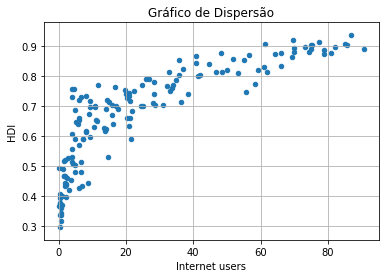

In [541]:
data1.plot.scatter(x='Internet users', y='HDI');
plt.title('Gráfico de Dispersão');
plt.grid(True);


Ajuste linear entre X3 e X4:
Coeficiente linear: 0.5362169483306735
Coeficiente angular: 0.005366559266311734


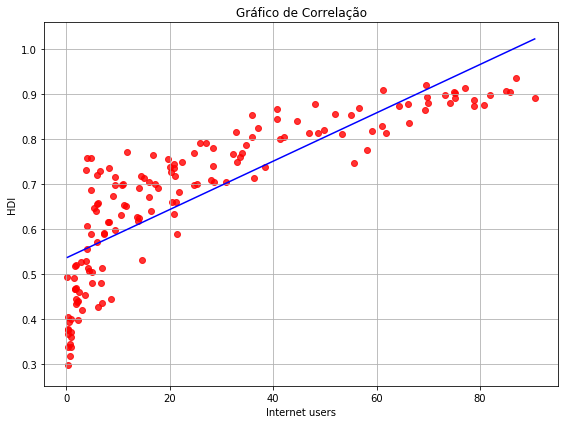

None


In [542]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico de Correlação')
    plt.xlabel('Internet users')
    plt.ylabel('HDI')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
print (reta(data1['Internet users'], data1['HDI']))

Taxa de correlação

In [543]:
data1['HDI'].corr(data1['Internet users'])

0.826129183703569

________________________________________________________________________________________________________________________________

HDI x Vehicles

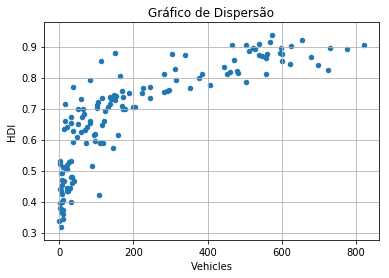

In [544]:
data1.plot.scatter(x='Vehicles', y='HDI');
plt.title('Gráfico de Dispersão');
plt.grid(True);

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.5459262552940168
Coeficiente angular: 0.0006065696567278675


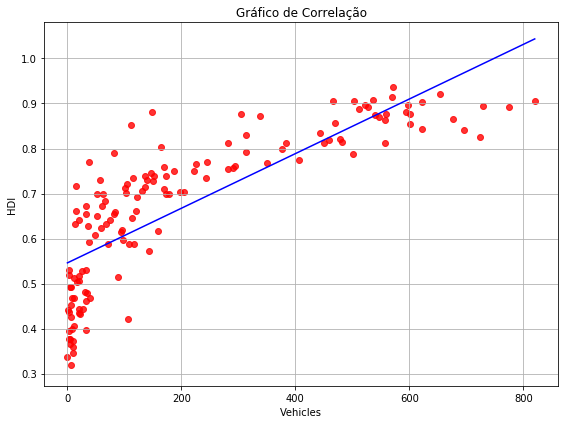

None


In [545]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico de Correlação')
    plt.xlabel('Vehicles')
    plt.ylabel('HDI')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
print (reta(data1['Vehicles'], data1['HDI']))

Taxa de correlação

In [546]:
data1['HDI'].corr(data1['Vehicles'])

0.8062395823637301

________________________________________________________________________________________________________________________________

Internet users x Vehicles

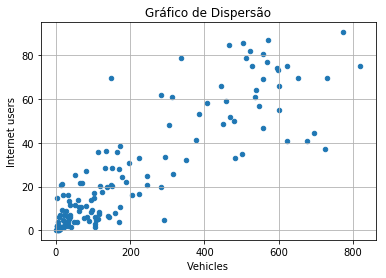

In [547]:
data1.plot.scatter(x='Vehicles', y='Internet users');
plt.title('Gráfico de Dispersão');
plt.grid(True);

Ajuste linear entre X3 e X4:
Coeficiente linear: 4.091515528256114
Coeficiente angular: 0.10219434180347048


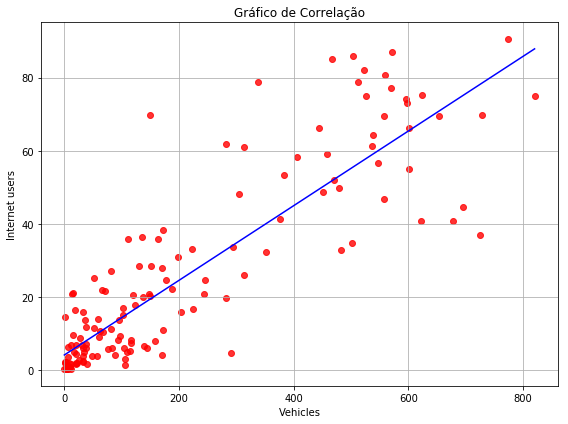

None


In [548]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico de Correlação')
    plt.xlabel('Vehicles')
    plt.ylabel('Internet users')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
print (reta(data1['Vehicles'], data1['Internet users']))

Taxa de correlação

In [549]:
data1['Internet users'].corr(data1['Vehicles'])

0.8685971301067985

________________________________________________________________________________________________________________________________

In [550]:
data1.corr()

,HDI,Internet users,Vehicles
HDI,1.000000,0.826129,0.806240
Internet users,0.826129,1.000000,0.868597
Vehicles,0.806240,0.868597,1.000000


A partir da tabela que mostra as taxas de correlação entre os dois fatores facultativos, Internet users e Vehicles, com o IDH, conclui-se que ambos os temas escolhidos estão correlacionados com o índice de desenvolvimento humano dos países.

# Conclusão

Os dados de correlação obtidos com o auxílio das ferramentas do pandas, o valor de aproximadamente 0,82 para IDH e Internet users, e aproximadamente 0,80 para IDH e Vehicles, mostram o quão relacionados esses fatores estão, não se restringindo apenas aos estudos da educação, saúde e renda, para análise do IDH.

A partir das análises dos gráficos, é possível concluir que a acessibilidade à internet e a disponibilidade de véiculos são realmente diretamente proporcionais ao IDH, o que confirma minhas duas hipóteses. A partir dos fatores analisados acima, algumas conclusões são bastante notórias , como identificar a proporcionalidade entre os temas, mas outras são passíveis de um campo subjetivo e que requerem um estudo mais complexo para responder, como os motivos dessa relação. Em suma, pode-se afirmar, que além dos conceitos que interferem diretamente no valor do IDH, outros também são bastante relevantes para compreender melhor os desenvolvimentos da maioria dos países. 

Além disso, outra questão pode ser discutida perante os resultados obtidos. Por mais que sejam assuntos completamente distintos, os resultados confirmam que quando compara-se os dados de veículos e usuários acessando a internet, percebe-se que o grupo de países com maiores índices no quesito internet, também é predominante na quantidade de veículos disponíveis na população. Sendo assim, conclui-se que países que se caracterizam por terem um sistema de transporte desenvolvido, também são apontados como aqueles que proporcionam a maior concentração ao acesso à informação para sua população. Entretanto, por mais que os temas se correlacionam, não é possível afirmar que exista uma relação concreta entre eles.

________________________________________________________________________________________________________________________________

# Dados - 2002

Mnter apenas os dado coletados em 2002

In [551]:
idh_2002 = IDH.loc[:, ["geo", 2002]]

internet_2002 = Internet.loc[:,["geo", 2002]]

veiculos_2002 = Veiculos.loc[:,["geo", 2002]]

Renomear colunas

In [552]:
idh_2002.rename(columns={"geo": "Country"}, inplace = True)
idh_idx2=idh_2002.set_index("Country")


internet_2002.rename(columns={"geo": "Country"}, inplace = True)
internet_idx2=internet_2002.set_index("Country")


veiculos_2002.rename(columns={"geo": "Country"}, inplace = True)
veiculos_idx2=veiculos_2002.set_index("Country")

In [553]:
idh_idx2.rename(columns={2002: "HDI"},inplace = True)

internet_idx2.rename(columns={2002: "Internet users"},inplace = True)

veiculos_idx2.rename(columns={2002: "Vehicles"},inplace = True)

# Join

In [554]:
df = idh_idx2.join(internet_idx2, how="inner", lsuffix="_HDI", rsuffix="_Internet users")

In [555]:
data = df.join(veiculos_idx2, how="inner")

In [556]:
data.sort_values(by='HDI', ascending=True).dropna()

,HDI,Internet users,Vehicles
Country,,,
Niger,0.266,0.1270,5.0
Ethiopia,0.306,0.0724,2.0
Sierra Leone,0.322,0.1760,4.0
Gambia,0.395,1.8000,8.0
Kenya,0.450,1.2100,17.0
Pakistan,0.465,2.5800,8.0
Lao,0.477,0.2680,57.0
Ghana,0.489,0.8300,19.0
Swaziland,0.493,1.8200,82.0


In [557]:
dados.head()

,HDI,Internet users,Vehicles
Country,,,
Burundi,0.319,0.700,5.670
Central African Republic,0.338,0.376,0.295
Burkina Faso,0.345,0.750,10.800
Mali,0.360,0.810,9.220
Sierra Leone,0.367,0.240,5.210


In [558]:
dados.tail()

,HDI,Internet users,Vehicles
Country,,,
Denmark,0.906,85.0,466.0
Ireland,0.908,61.2,537.0
Switzerland,0.914,77.2,569.0
Australia,0.921,69.5,653.0
Norway,0.936,86.9,572.0


# Medidas descritivas

# HDI

In [559]:
data["HDI"].describe()

count    144.000000
mean       0.650444
std        0.170972
min        0.266000
25%        0.539500
50%        0.684000
75%        0.788250
max        0.918000
Name: HDI, dtype: float64

# Internet users

In [560]:
data["Internet users"].describe()

count    153.000000
mean      13.359787
std       18.747093
min        0.000430
25%        1.210000
50%        4.600000
75%       18.000000
max       79.100000
Name: Internet users, dtype: float64

# Vehicles

In [561]:
data["Vehicles"].describe()

count     80.00000
mean     255.04625
std      220.69212
min        1.00000
25%       67.00000
50%      150.50000
75%      448.00000
max      738.00000
Name: Vehicles, dtype: float64

# Gráficos de Dispersão e Correlação

HDI x Internet users

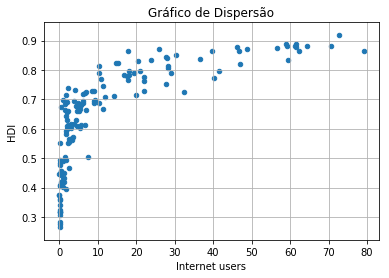

In [562]:
data.plot.scatter(x='Internet users', y='HDI');
plt.title('Gráfico de Dispersão');
plt.grid(True);

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.5599360499115421
Coeficiente angular: 0.006774688508339371


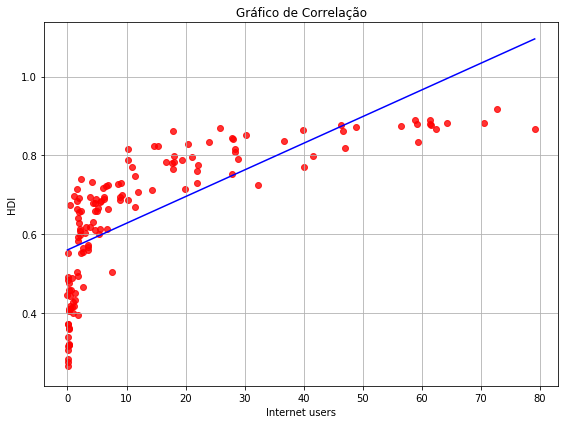

None


In [563]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico de Correlação')
    plt.xlabel('Internet users')
    plt.ylabel('HDI')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
print (reta(data['Internet users'], data['HDI']))

Taxa de correlação

In [564]:
data['HDI'].corr(data['Internet users'])

0.7230049534861622

________________________________________________________________________________________________________________________________

HDI x Vehicles

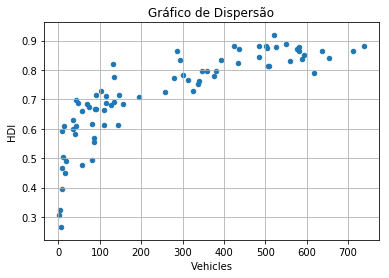

In [565]:
data.plot.scatter(x='Vehicles', y='HDI');
plt.title('Gráfico de Dispersão');
plt.grid(True);

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.5082296368314959
Coeficiente angular: 0.0005576039938362107


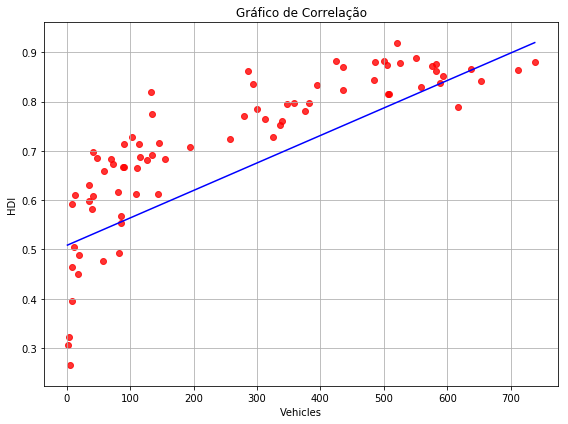

None


In [566]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico de Correlação')
    plt.xlabel('Vehicles')
    plt.ylabel('HDI')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
print (reta(data['Vehicles'], data['HDI']))

Taxa de correlação

In [567]:
data['HDI'].corr(data['Vehicles'])

0.8152304231993586

________________________________________________________________________________________________________________________________

Internet users x Vehicles

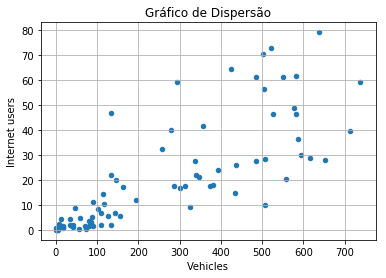

In [568]:
data.plot.scatter(x='Vehicles', y='Internet users');
plt.title('Gráfico de Dispersão');
plt.grid(True);

Ajuste linear entre X3 e X4:
Coeficiente linear: -6.28567873770354
Coeficiente angular: 0.07702707097418068


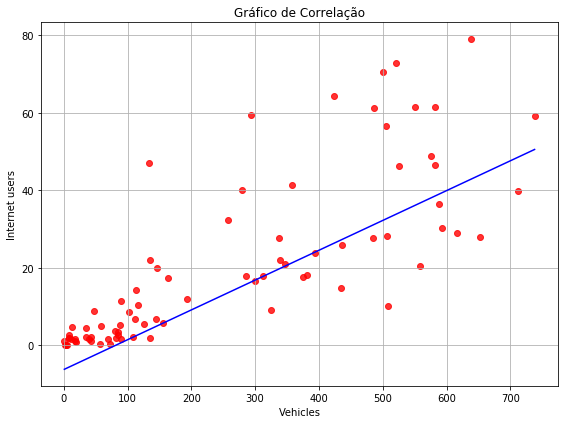

None


In [569]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico de Correlação')
    plt.xlabel('Vehicles')
    plt.ylabel('Internet users')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
print (reta(data['Vehicles'], data['Internet users']))

Taxa de correlação

In [570]:
data['Internet users'].corr(data['Vehicles'])

0.7909845616100522

________________________________________________________________________________________________________________________________

# Conclusão comparativa

Segundo as análises das mesmas variáveis, porém levando em consideração o ano de 2002, percebe-se uma leve diferença nos índices de internet e veículos. No início do século 21, o acesso à informação digital era restrita à países altamente desenvolvidos, tornando-se uma peculiaridade e um fator de desequilíbrio às outras nações, já que esse mecanismo potencializa o crescimento econômico, social e político de uma região. Além disso, havia uma certa disparidade nos sistemas de transporte das nações mundiais, justificada pelo baixo desenvolvimento tecnológico, econômico e político da maioria dos países. 

Outra conclusão que filtra-se dos resultados obtidos em 2002, resume-se nas taxas de correlação entre as 3 variáveis. Em apenas 5 anos, é notório o avanço das nações nos quesitos: acesso à internet e sistema de transporte, em especial, daquelas que não apresentavam qualquer índice de relevância concreta. Assim, a discrepância dos valores apresentados em cada país, dimimuiu a taxa de correlação em comparação com o IDH, uma vez que em 5 anos, o índice de desenvolvimento humano manteve-se praticamente o mesmo em todas as regiões no ano de 2007. Em compensação, a taxa de correlação entre o acesso à informação digital e a disponibilidade de veículo para a população aumentou.

Dessa modo, pode-se resumir que a correlação existe, mas são agentes coadjuvantes no estudo do IDH.